<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/fuji_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Fuji descent issue***

## ***Data acquisition***

In [2]:
import numpy as np

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji)
print(fuji.shape)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]
(300, 5)


## ***Problem 1: Data visualization***

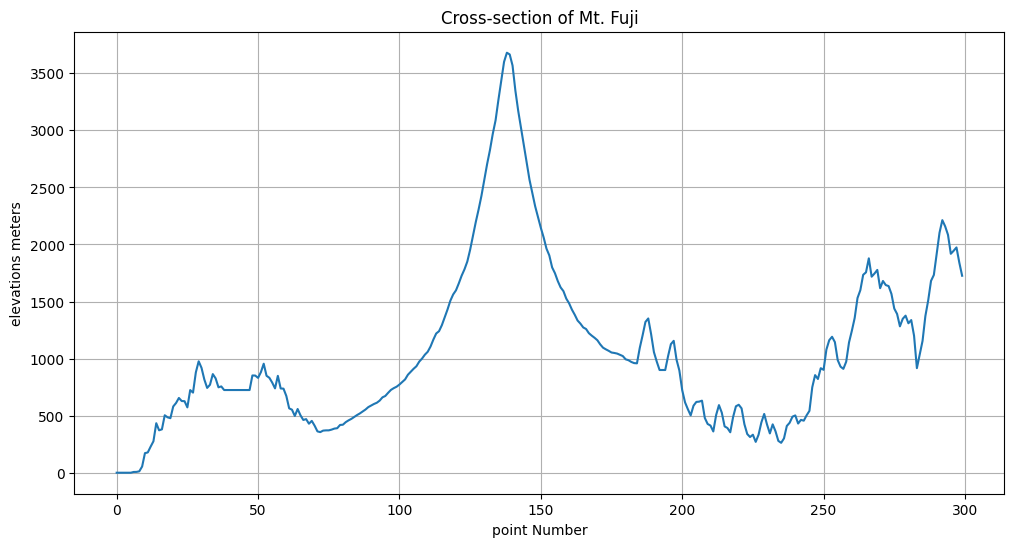

In [3]:
import matplotlib.pyplot as plt

# extract point numbers and elevations
point_numbers = fuji[:, 0]
elevations = fuji[:, 3]

#Visualize the cross-section of Mt. Fuji
plt.figure(figsize=(12,6))
plt.plot(point_numbers, elevations)
plt.title('Cross-section of Mt. Fuji')
plt.xlabel('point Number')
plt.ylabel('elevations meters')
plt.grid(True)
plt.show()

## ***Problem 2: Create a function to calculate the gradient at a certain point***

In [4]:
def calculate_gradient(fuji_data, current_point):
    if current_point <= 0:
        # cannot calculate gradient at the first point
        return 0 # No previous point to compare

    # Extract current and previous point data
    current_x = fuji_data[current_point, 0] # point number
    current_y = fuji_data[current_point, 3] # elevation

    prev_x = fuji_data[current_point - 1, 0] # previous point number
    prev_y = fuji_data[current_point - 1, 3] # previous elevation

    #calculate gradient: (y2 - y1) / (x2 - x1)
    dx = current_x - prev_x
    dy = current_y - prev_y

    # Avoid divisition by zero
    if dx == 0:
        return 0

    return dy / dx

# test
current_point = 112
gradient = calculate_gradient(fuji, current_point)
print(f'Grafient at point {current_point}: {gradient}')

Grafient at point 112: 60.77999999999997


## ***Problem 3: Create a function to calculate the destination point***

In [5]:
def calculate_next_point(fuji_data, current_point, alpha=0.2):
    # Calculate the gradient at the current point
    gradient = calculate_gradient(fuji_data, current_point)

    #Calculate the next pint: current_point - alpha * gradient
    next_point_float = current_point - alpha * gradient

    #round to the nearest integer
    next_point = round(next_point_float)

    # Ensure the next pint is within valid range
    if next_point < 0:
        next_point = 0
    elif next_point >= len(fuji_data):
        next_point = len(fuji_data) - 1

    return next_point

current_point = 100
next_point = calculate_next_point(fuji, current_point)
print(f'next point: {next_point}')

next point: 96


## ***Problem 4: create a function to go down the mountain***

In [6]:
def descend_mountain(fuji_data, start_point=136, alpha= 0.2, max_steps=1000):
    #initialize the path with the starting point
    path = [start_point]
    current_point = start_point

    # descend until we reach a local minimum or maximum steps
    for _ in range(max_steps):
        next_point = calculate_next_point(fuji_data, current_point, alpha)

        #if we're stuck at the same point, we're reached a local minimum
        if next_point == current_point:
            break

        #move to the next point
        current_point = next_point
        path.append(current_point)

    return path

#test
descending_path = descend_mountain(fuji)
print(f'Descendig Path: {descending_path}')

Descendig Path: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


## ***Problem 5: Visualitation of the descent process***

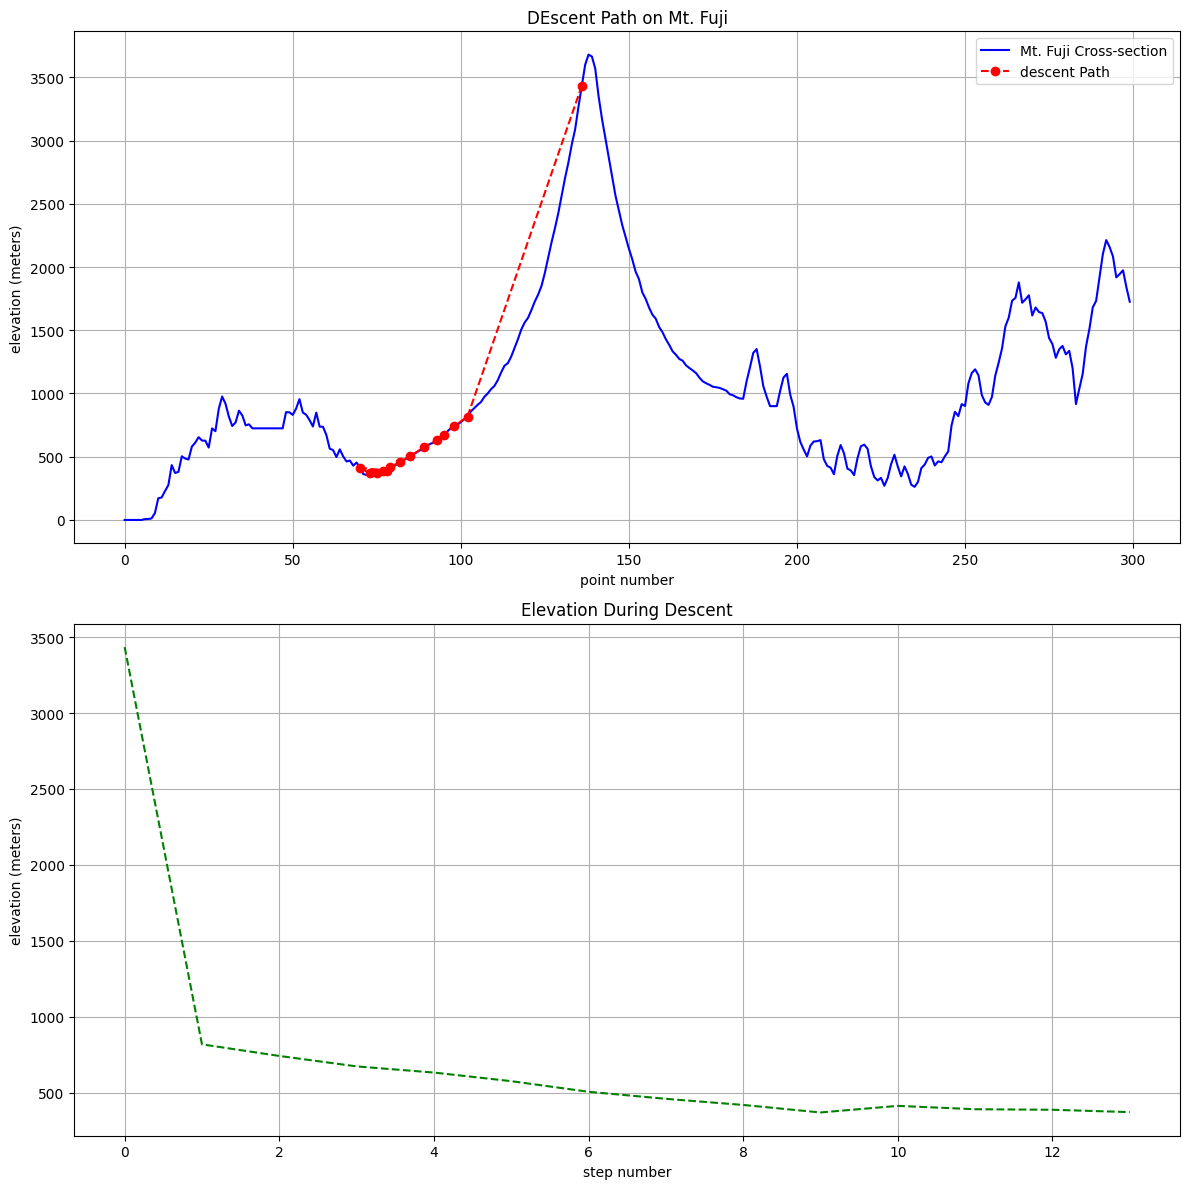

In [7]:
def visualize_descent(fuji_data, path):
    #extract point numbers and elevations
    point_numbers = fuji_data[:, 0]
    elevation = fuji_data[:, 3]

    #extract the path coordinates
    path_points = [fuji_data[p, 0] for p in path]
    path_elevations = [fuji_data[p, 3] for p in path]

    #create  a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    #plot the cross-section with descent path
    ax1.plot(point_numbers, elevations, 'b-', label='Mt. Fuji Cross-section')
    ax1.plot(path_points, path_elevations, 'ro--', label='descent Path')
    ax1.set_title('DEscent Path on Mt. Fuji')
    ax1.set_xlabel('point number')
    ax1.set_ylabel('elevation (meters)')
    ax1.grid(True)
    ax1.legend()

    #plot the elevation changeduring descent
    steps = list(range(len(path)))
    ax2.plot(steps, path_elevations, 'g--')
    ax2.set_title('Elevation During Descent')
    ax2.set_xlabel('step number')
    ax2.set_ylabel('elevation (meters)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

#test
descent_path = descend_mountain(fuji, start_point=136, alpha=0.2)
visualize_descent(fuji, descent_path)

## ***Problem 6: Change of initial value***

In [8]:
def compute_all_descent(fuji_data, alpha=0.2):
    all_paths = {}
    initial_indices = [20, 50, 100, 136, 142, 180]

    for start_point in initial_indices:
        path = descend_mountain(fuji_data, start_point, alpha)
        all_paths[start_point] = path

    return all_paths

all_descents = compute_all_descent(fuji)
print(all_descents)

{20: [20, 0], 50: [50, 54, 58, 80], 100: [100, 96, 90, 87, 84, 81, 77, 75], 136: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75], 142: [142, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178

## ***Problem 7: Visualizaton of the descent process for each initial value***

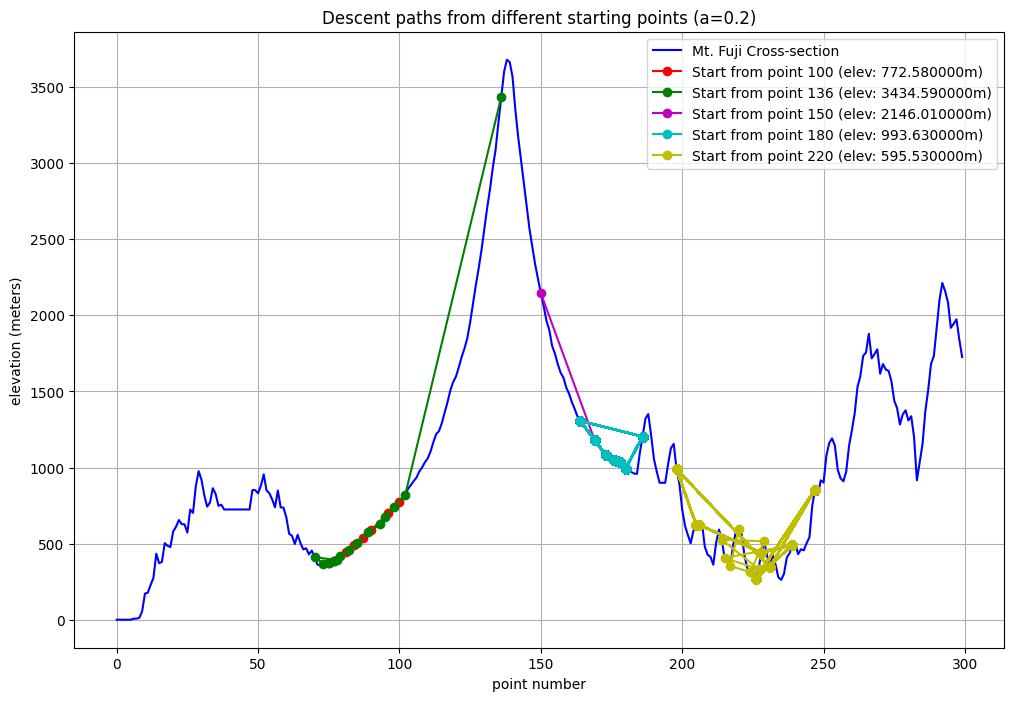

In [9]:
def visualize_multiple_descent(fuji_data, start_points, alpha=0.2):
    #extract point number and elevtions
    point_numbers = fuji_data[:, 0]
    elevations = fuji_data[:, 3]

    #create figure
    plt.figure(figsize=(12, 8))

    #plot the cross-section
    plt.plot(point_numbers, elevations, 'b', label='Mt. Fuji Cross-section')

    #plot descent paths form different starting points
    colors = ['r', 'g', 'm', 'c', 'y']

    for i, start in enumerate(start_points):
        path = descend_mountain(fuji_data, start, alpha)
        path_points = [fuji_data[p,0] for p in path]
        path_elevations = [fuji_data[p, 3] for p in path]

        color = colors[i % len(colors)]
        plt.plot(path_points, path_elevations, f'{color}o-',
                 label=f'Start from point {start} (elev: {fuji_data[start, 3]:-2f}m)')

    plt.title(f'Descent paths from different starting points (a={alpha})')
    plt.xlabel('point number')
    plt.ylabel('elevation (meters)')
    plt.grid(True)
    plt.legend()
    plt.show()

start_points = [100, 136, 150, 180, 220]
visualize_multiple_descent(fuji, start_points)

## ***Problem 8: Hyperparameter changes***

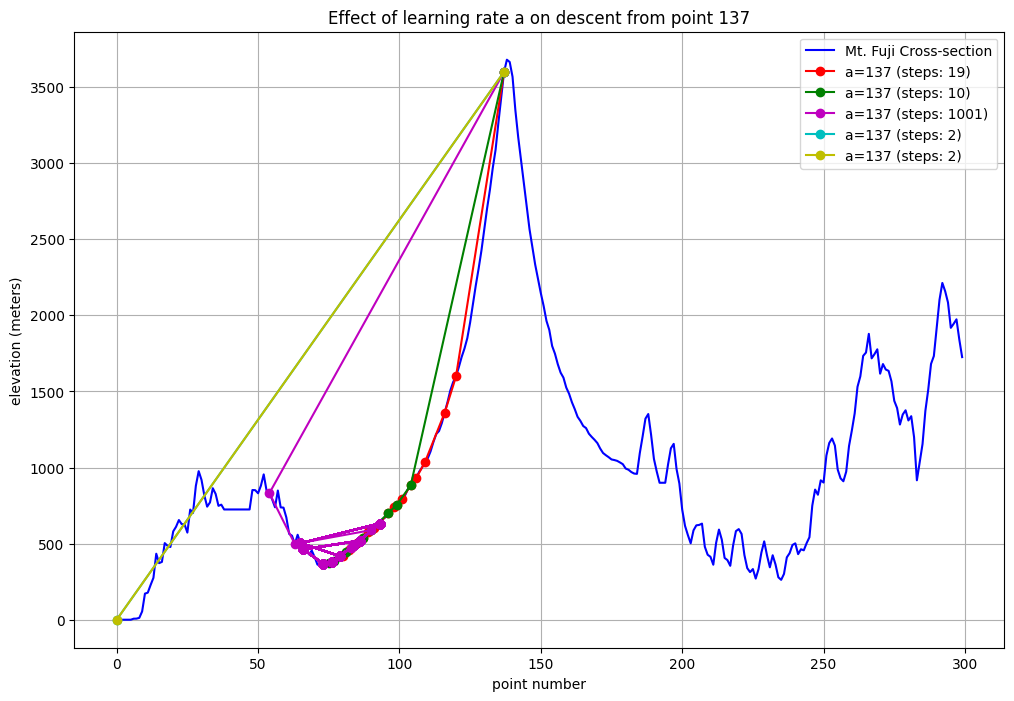

In [10]:
def visualize_alpha_effect(fuji_data, start_point=136, alphas=[0.1, 0.2, 0.5, 1.0, 2.0]):
    #extract point number and elevtions
    point_numbers = fuji_data[:, 0]
    elevations = fuji_data[:, 3]

    #create figure
    plt.figure(figsize=(12, 8))

    #plot the cross-section
    plt.plot(point_numbers, elevations, 'b', label='Mt. Fuji Cross-section')

    #plot descent paths form different starting points
    colors = ['r', 'g', 'm', 'c', 'y']

    for i, alpha in enumerate(alphas):
        path = descend_mountain(fuji_data, start_point, alpha)
        path_points = [fuji_data[p,0] for p in path]
        path_elevations = [fuji_data[p, 3] for p in path]

        color = colors[i % len(colors)]
        plt.plot(path_points, path_elevations, f'{color}o-',
                 label=f'a={start_point} (steps: {len(path)})')

    plt.title(f'Effect of learning rate a on descent from point {start_point}')
    plt.xlabel('point number')
    plt.ylabel('elevation (meters)')
    plt.grid(True)
    plt.legend()
    plt.show()

start_point = 137
visualize_alpha_effect(fuji, start_point)